In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [ ]:
#Split the dataset
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

RIDGE

In [26]:
#Different alpha values to observe behavior
alpha_values = [0,0.1,1,10,100]
print("RIDGE REGRESSION COEFFICIENT ")
for alpha_value in alpha_values:
    ridge_model = Ridge(alpha=alpha_value)

    #Train the model
    ridge_model.fit(X_train,y_train)

    #Print coefficients
    print(f"Alpha : {alpha_value}")
    print(pd.Series(ridge_model.coef_,index=x.columns))
    print("-"*40)


RIDGE REGRESSION COEFFICIENT 
Alpha : 0
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64
----------------------------------------
Alpha : 0.1
TV           0.044730
Radio        0.189194
Newspaper    0.002761
dtype: float64
----------------------------------------
Alpha : 1
TV           0.044730
Radio        0.189189
Newspaper    0.002763
dtype: float64
----------------------------------------
Alpha : 10
TV           0.044730
Radio        0.189131
Newspaper    0.002779
dtype: float64
----------------------------------------
Alpha : 100
TV           0.044731
Radio        0.188561
Newspaper    0.002936
dtype: float64
----------------------------------------


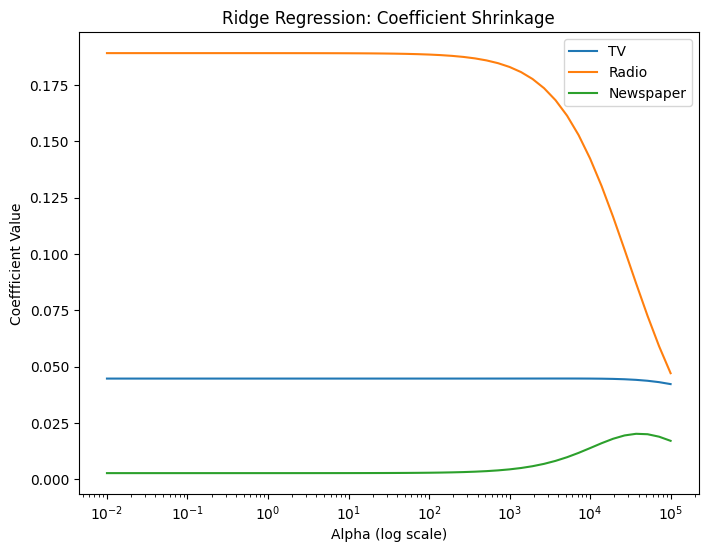

In [16]:
#generate values on scale
alphas = np.logspace(-2,5,50)
#Store coefficients
coefficients_path = []

for alpha_value in alphas:
    ridge = Ridge(alpha=alpha_value)
    ridge.fit(X_train,y_train)
    coefficients_path.append(ridge.coef_)

coefficients_path = np.array(coefficients_path)
plt.figure(figsize=(8,6))
plt.plot(alphas,coefficients_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coeffficient Value")
plt.title("Ridge Regression: Coefficient Shrinkage")
plt.legend(x.columns)
plt.show()





LASSO

In [25]:
#Different alpha values to observe behavior
alpha_values = [0,0.1,1,10,100]
print("LASSO REGRESSION COEFFICIENT ")
for alpha_value in alpha_values:
    lasso_model = Lasso(alpha=alpha_value)

    #Train the model
    lasso_model.fit(X_train,y_train)

    #Print coefficients
    print(f"Alpha = {alpha_value}")
    print(pd.Series(lasso_model.coef_,index=x.columns))
    print("-"*40)


LASSO REGRESSION COEFFICIENT 
Alpha = 0
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64
----------------------------------------
Alpha = 0.1
TV           0.044720
Radio        0.188811
Newspaper    0.002627
dtype: float64
----------------------------------------
Alpha = 1
TV           0.044631
Radio        0.185350
Newspaper    0.001422
dtype: float64
----------------------------------------
Alpha = 10
TV           0.043747
Radio        0.145060
Newspaper    0.000000
dtype: float64
----------------------------------------
Alpha = 100
TV           0.032409
Radio        0.000000
Newspaper    0.000000
dtype: float64
----------------------------------------


/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspaces/SML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+02, tolerance: 4.150e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

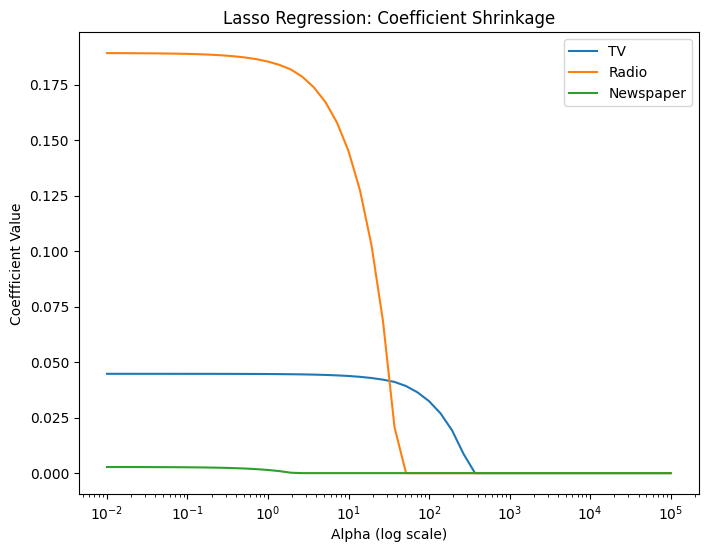

In [24]:
alphas = np.logspace(-2,5,50)
#Store coefficients
coefficients_path = []

for alpha_value in alphas:
    lasso = Lasso(alpha=alpha_value)
    lasso.fit(X_train,y_train)
    coefficients_path.append(lasso.coef_)

coefficients_path = np.array(coefficients_path)
plt.figure(figsize=(8,6))
plt.plot(alphas,coefficients_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coeffficient Value")
plt.title("Lasso Regression: Coefficient Shrinkage")
plt.legend(x.columns)
plt.show()


In [ ]:
#define aplha search space (Ridge)
param_grid = {'alpha':np.logspace(-3,2,20)}
ridge_cv = GridSearchCV(Ridge(),param_grid,scoring= 'neg_mean_squared_error'
                        )
ridge_cv.fit(X_train,y_train)
print("Best Alpha (Ridge):",ridge_cv.best_params_['alpha'])

Best Alpha (Ridge): 0.001


In [31]:
#define aplha search space(Lasso)
param_grid = {'alpha':np.logspace(-3,2,20)}
lasso_cv = GridSearchCV(Lasso(),param_grid,scoring= 'neg_mean_squared_error'
                        )
lasso_cv.fit(X_train,y_train)
print("Best Alpha (Lasso):",ridge_cv.best_params_['alpha'])

Best Alpha (Lasso): 1.438449888287663


In [32]:
#best models
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
#predictions
ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)
#errors
print("Ridge MSE:",mean_squared_error(y_test,ridge_pred))
print("Lasso MSE:",mean_squared_error(y_test,lasso_pred))


Ridge MSE: 3.1341162711720285
Lasso MSE: 3.1341162711720285


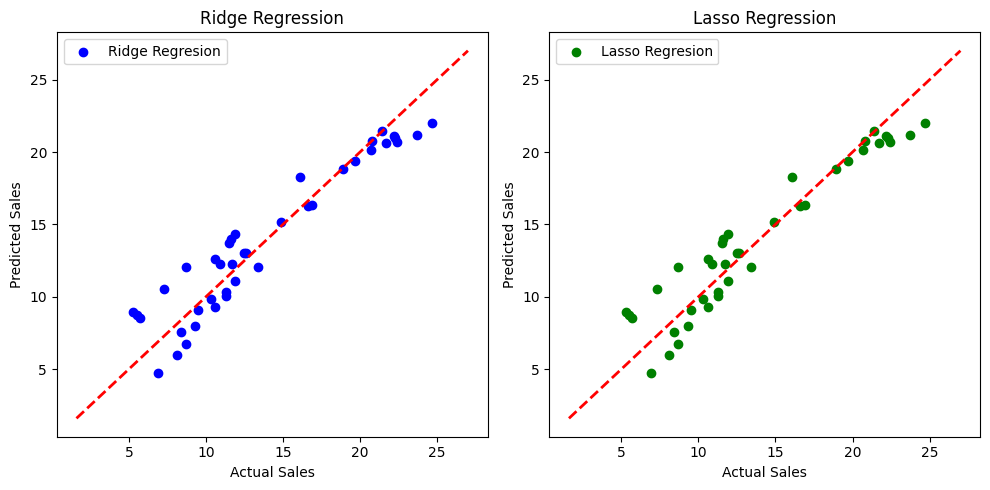

In [39]:
#plot actual vs predicted values for both models
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test,ridge_pred,color='blue',label='Ridge Regresion')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--',lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Ridge Regression")
plt.legend()


plt.subplot(1,2,2)
plt.scatter(y_test,lasso_pred,color='green',label='Lasso Regresion')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--',lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Lasso Regression")
plt.legend()

plt.tight_layout()
plt.show()